In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#To mute Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Weekly
df_w_2020_23 = pd.read_csv('./data/VolumeDataset_2020_to_2023.csv')

# Monthly
df_m_2020_23 = pd.read_csv('./data/Month_clean_data.csv')

In [3]:
#  Made Date index column 
dates = df_w_2020_23.Year*100+df_w_2020_23.Week
df_w_2020_23['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_w_2020_23 = df_w_2020_23.set_index('Date')

df_m_2020_23 = df_m_2020_23.set_index('Date')



for df in [df_w_2020_23, df_m_2020_23]:
    display(df.head())

,Year,Week,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,,
2020-01-12,2020,1,16911.93,33756.53,48253.47,51912.76,34120.12,48682.29,0.0,118862.33,8394.66,604.80,164894.79,70374.62,185102.58,781869.95,788121.16
2020-01-19,2020,2,16678.16,35520.72,68177.88,57986.37,42388.81,75084.86,0.0,148760.74,19815.62,650.20,257190.84,87611.24,304985.01,1114849.33,1129493.91
2020-01-26,2020,3,18848.19,23953.29,74396.13,39749.67,50518.35,90128.99,0.0,147718.97,22392.94,832.80,209441.27,90702.62,245815.56,1014497.72,1014497.72
2020-02-02,2020,4,13864.97,30214.57,66323.83,74711.48,44585.04,156190.36,0.0,162732.93,32756.68,750.60,181776.78,133732.89,159148.69,1056787.47,1056787.45
2020-02-09,2020,5,19588.03,27242.09,47763.37,83659.99,60050.33,154508.37,0.0,161117.18,26246.31,695.61,198066.16,132061.48,202806.64,1113804.41,1116246.21


,Month,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
Date,,,,,,,,,,,,,,,,
01-01-2020,1,66303.25,123445.11,257151.31,224360.28,171612.32,370086.50,0.0,578074.97,83359.90,2838.40,813303.68,382421.37,895051.84,3968004.47,3988900.24
01-02-2020,2,74862.97,104828.98,208028.44,434917.15,238676.95,476956.27,0.0,534379.41,142714.33,3102.46,568893.78,675279.49,757637.25,4220272.12,4222713.99
01-03-2020,3,37087.81,144506.05,620054.99,474525.58,326302.03,786295.16,0.0,199910.55,51569.67,2823.86,304063.81,447513.10,1247417.93,4642064.05,4657620.35
01-04-2020,4,42797.94,215447.04,386198.01,469504.46,523446.95,760255.22,0.0,54273.49,42244.35,1558.74,72899.64,507490.71,325247.66,3401358.28,3401358.27
01-05-2020,5,22426.57,147490.98,581634.38,940433.68,796148.85,477740.10,0.0,201199.84,61656.62,3883.37,403408.38,303068.90,844138.11,4783223.72,4783223.66


In [47]:
train = pd.DataFrame(df_w_2020_23['N2'][:200])
test = pd.DataFrame(df_w_2020_23['N2'][200:])

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [55]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 


# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train.astype(np.float32), scaled_train.astype(np.float32), length=n_input, batch_size=2)

In [56]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [57]:
# define model
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

In [58]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
cp1 = ModelCheckpoint('./model/b.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [60]:
# fit model
model.fit(generator,epochs=200)

Epoch 1/200


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0826 - root_mean_squared_error: 0.2863
Epoch 2/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0506 - root_mean_squared_error: 0.2215
Epoch 3/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291 - root_mean_squared_error: 0.1692
Epoch 4/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282 - root_mean_squared_error: 0.1673
Epoch 5/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280 - root_mean_squared_error: 0.1660
Epoch 6/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - root_mean_squared_error: 0.1561
Epoch 7/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 - root_mean_squared_error: 0.1377
Epoch 8/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - root_mean_squared_error: 0.1406
Epoch 9/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - root_mean_squared_error: 0.1305
Epoch 10/200
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 - root_mean_squared_error: 0.1471
Epoch 11/20

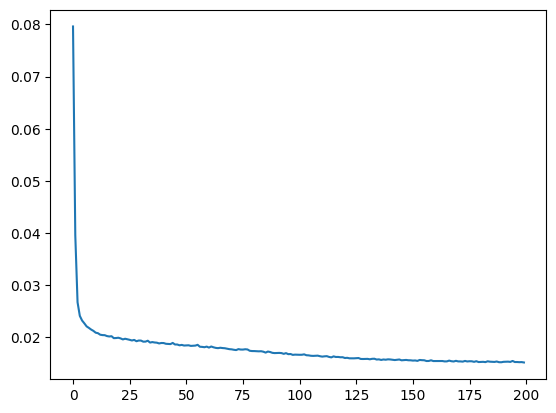

In [61]:

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [62]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [71]:
test_predictions

[array([0.4094906], dtype=float32),
 array([0.38256267], dtype=float32),
 array([0.3808215], dtype=float32),
 array([0.375168], dtype=float32),
 array([0.36918575], dtype=float32),
 array([0.36454135], dtype=float32),
 array([0.36058477], dtype=float32),
 array([0.35714802], dtype=float32),
 array([0.3542009], dtype=float32),
 array([0.35167208], dtype=float32)]

In [79]:
test_predictions[0][0]

0.4094906

In [81]:
df = pd.DataFrame(test.index)
df['N2'] = scaled_test
df['predictions'] = [x[0] for x in test_predictions]

In [82]:
df

,Date,N2,predictions
0,2023-10-29,0.384299,0.409491
1,2023-11-05,0.413461,0.382563
2,2023-11-12,0.247085,0.380821
3,2023-11-19,0.234140,0.375168
4,2023-11-26,0.377010,0.369186
5,2023-12-03,0.253436,0.364541
6,2023-12-10,0.181353,0.360585
7,2023-12-17,0.367095,0.357148
8,2023-12-24,0.255133,0.354201
9,2023-12-31,0.495645,0.351672


In [84]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df['N2'],df['predictions']))
print(rmse)

0.10702104998090457


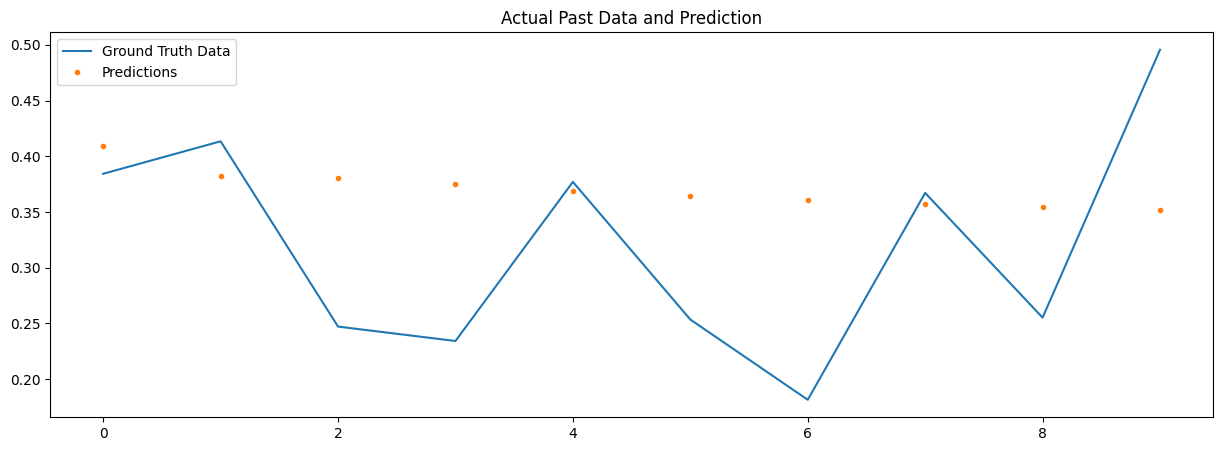

In [87]:
ax = df[['N2']].plot(figsize=(15, 5))

df['predictions'].plot(ax=ax, style='.')
plt.legend(['Ground Truth Data', 'Predictions'])
ax.set_title('Actual Past Data and Prediction')
plt.show()